In [1]:
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras.optimizers import Adam
from scipy.misc import imread
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import plot_model

import os
import cv2
import dlib
import numpy as np
import argparse
from contextlib import contextmanager
from wide_resnet import WideResNet
from keras.utils.data_utils import get_file
#import face_recognition

K.clear_session() 
%matplotlib inline

/home/saadi/.virtualenvs/keras-latest/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#creates a list of file paths of images in a folder for python 3
import os
yield_images= [os.path.join('/home/saadi/Desktop/test_xml _write/images', file) for file in os.listdir('/home/saadi/Desktop/test_xml _write/images') if file.endswith('.jpg')]
print(yield_images)
yield_images.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))# reorganizes the list
print('###################################################')
print(yield_images)



['/home/saadi/Desktop/test_xml _write/images/8.jpg', '/home/saadi/Desktop/test_xml _write/images/10.jpg', '/home/saadi/Desktop/test_xml _write/images/4.jpg', '/home/saadi/Desktop/test_xml _write/images/7.jpg', '/home/saadi/Desktop/test_xml _write/images/6.jpg', '/home/saadi/Desktop/test_xml _write/images/2.jpg', '/home/saadi/Desktop/test_xml _write/images/0.jpg', '/home/saadi/Desktop/test_xml _write/images/3.jpg', '/home/saadi/Desktop/test_xml _write/images/5.jpg', '/home/saadi/Desktop/test_xml _write/images/1.jpg', '/home/saadi/Desktop/test_xml _write/images/9.jpg']
###################################################
['/home/saadi/Desktop/test_xml _write/images/0.jpg', '/home/saadi/Desktop/test_xml _write/images/1.jpg', '/home/saadi/Desktop/test_xml _write/images/2.jpg', '/home/saadi/Desktop/test_xml _write/images/3.jpg', '/home/saadi/Desktop/test_xml _write/images/4.jpg', '/home/saadi/Desktop/test_xml _write/images/5.jpg', '/home/saadi/Desktop/test_xml _write/images/6.jpg', '/home/sa

In [3]:
weight_file='/home/saadi/age-keras-imdb/pretrained_models/weights.18-4.06.hdf5'
# load model and weights
k=8
img_size = 64
model = WideResNet(img_size, depth=16, k=k)()
model.load_weights(weight_file)
print(model.summary())
plot_model(model, to_file='model.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   432         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [4]:
def draw_label(image, point, label, font=cv2.FONT_HERSHEY_SIMPLEX,
               font_scale=1, thickness=2):
    size = cv2.getTextSize(label, font, font_scale, thickness)[0]
    x, y = point
    cv2.rectangle(image, (x, y - size[1]), (x + size[0], y), (255, 0, 0), cv2.FILLED)
    cv2.putText(image, label, point, font, font_scale, (255, 255, 255), thickness)

/home/saadi/Desktop/test_xml _write/images/0.jpg
('Image height is =', 1288)
('Image width is =', 1998)
('The output of dlib fed into cnn', rectangles[[(246, 435) (323, 513)], [(1095, 174) (1228, 308)], [(1277, 160) (1355, 238)], [(1678, 306) (1771, 399)], [(749, 234) (813, 298)], [(1729, 392) (1841, 504)], [(650, 496) (727, 573)], [(693, 1176) (711, 1194)]])
<class 'dlib.rectangles'>
<class 'dlib.rectangle'>
('Number of Faces detected', 8)
Detection [(246, 435) (323, 513)], score: 1.80947242128, face_type:2
Detection [(1095, 174) (1228, 308)], score: 0.531141582919, face_type:0
Detection [(1277, 160) (1355, 238)], score: 0.432846406569, face_type:2
Detection [(1678, 306) (1771, 399)], score: 0.422283474399, face_type:0
Detection [(749, 234) (813, 298)], score: 0.0696447529329, face_type:0
Detection [(1729, 392) (1841, 504)], score: 0.0273032342263, face_type:1
Detection [(650, 496) (727, 573)], score: -0.113560339341, face_type:2
Detection [(693, 1176) (711, 1194)], score: -0.11926315

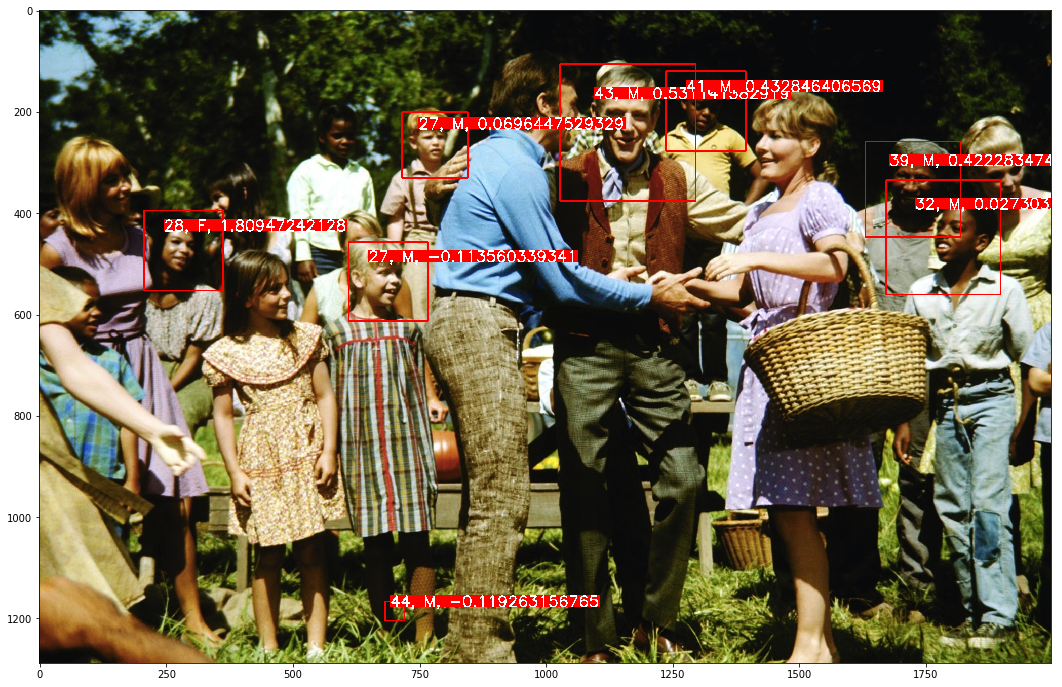

/home/saadi/Desktop/test_xml _write/images/1.jpg
('Image height is =', 1396)
('Image width is =', 2048)
('The output of dlib fed into cnn', rectangles[[(1444, 145) (1556, 256)], [(503, 120) (615, 231)], [(873, 263) (951, 341)], [(1141, 255) (1234, 347)]])
<class 'dlib.rectangles'>
<class 'dlib.rectangle'>
('Number of Faces detected', 4)
Detection [(1444, 145) (1556, 256)], score: 1.51609374631, face_type:1
Detection [(503, 120) (615, 231)], score: 1.20708880769, face_type:2
Detection [(873, 263) (951, 341)], score: 0.704595867587, face_type:0
Detection [(1141, 255) (1234, 347)], score: 0.198329464085, face_type:1
('the i is ', 0)
('the d is ', rectangle(1444,145,1556,256))
('the i is ', 1)
('the d is ', rectangle(503,120,615,231))
('the i is ', 2)
('the d is ', rectangle(873,263,951,341))
('the i is ', 3)
('the d is ', rectangle(1141,255,1234,347))


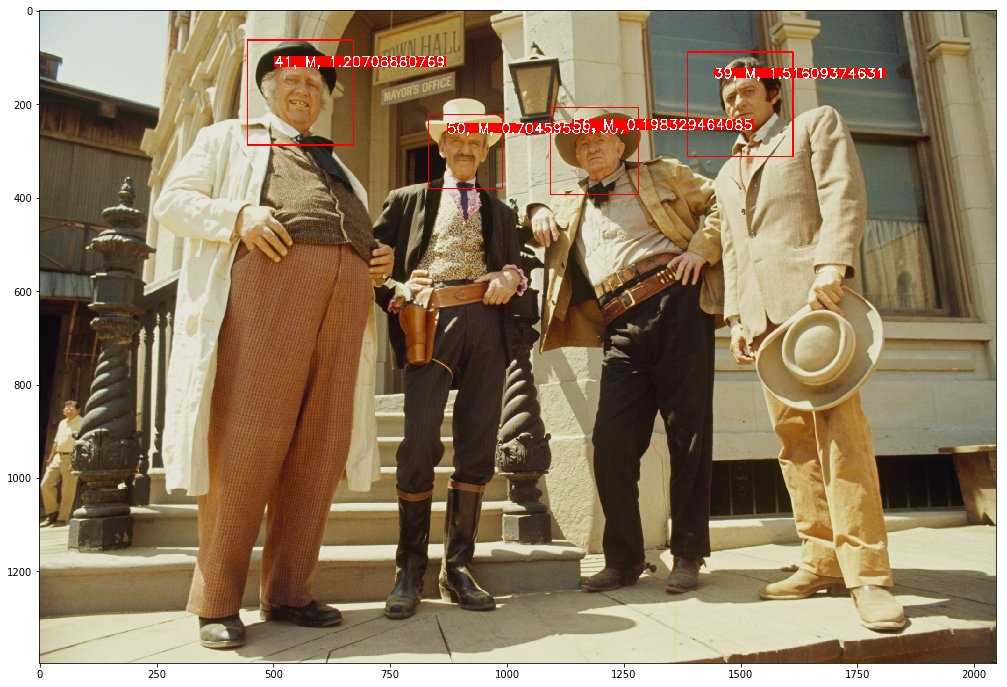

/home/saadi/Desktop/test_xml _write/images/2.jpg
('Image height is =', 1369)
('Image width is =', 2048)
('The output of dlib fed into cnn', rectangles[[(1148, 250) (1380, 482)], [(176, 102) (508, 435)]])
<class 'dlib.rectangles'>
<class 'dlib.rectangle'>
('Number of Faces detected', 2)
Detection [(1148, 250) (1380, 482)], score: 0.845220867587, face_type:0
Detection [(176, 102) (508, 435)], score: 0.695735314955, face_type:2
('the i is ', 0)
('the d is ', rectangle(1148,250,1380,482))
('the i is ', 1)
('the d is ', rectangle(176,102,508,435))


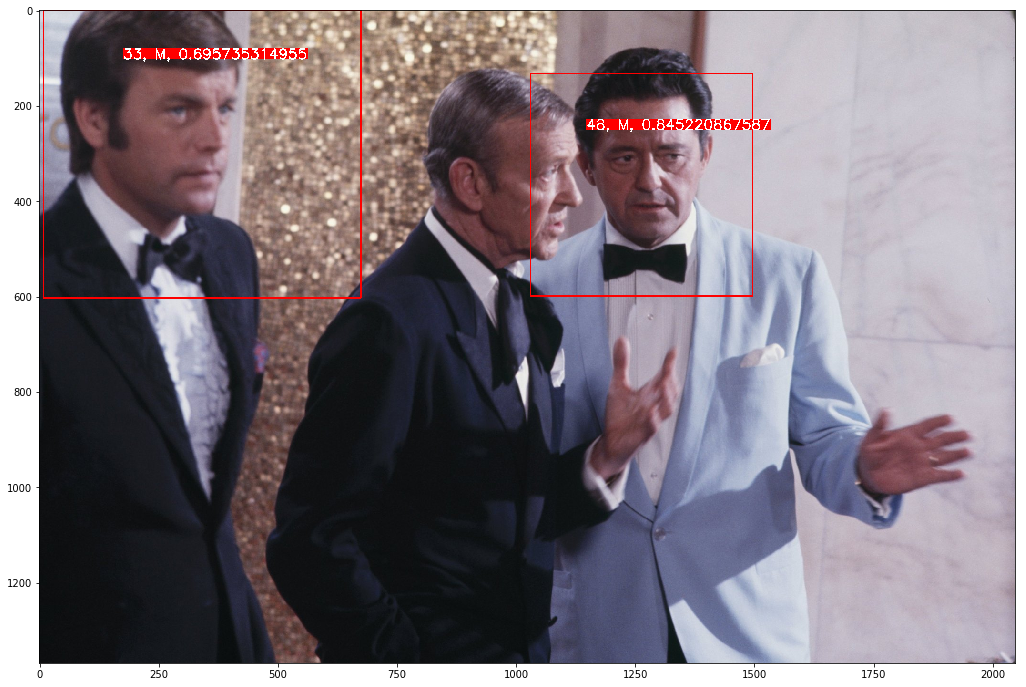

/home/saadi/Desktop/test_xml _write/images/3.jpg
('Image height is =', 2048)
('Image width is =', 1593)
('The output of dlib fed into cnn', rectangles[[(485, 338) (503, 356)], [(657, 422) (850, 615)], [(243, 268) (261, 286)], [(69, 266) (87, 284)]])
<class 'dlib.rectangles'>
<class 'dlib.rectangle'>
('Number of Faces detected', 4)
Detection [(485, 338) (503, 356)], score: 0.0770309959552, face_type:2
Detection [(657, 422) (850, 615)], score: 0.00978503571958, face_type:2
Detection [(243, 268) (261, 286)], score: -0.0542878116468, face_type:2
Detection [(69, 266) (87, 284)], score: -0.0995962465934, face_type:1
('the i is ', 0)
('the d is ', rectangle(485,338,503,356))
('the i is ', 1)
('the d is ', rectangle(657,422,850,615))
('the i is ', 2)
('the d is ', rectangle(243,268,261,286))
('the i is ', 3)
('the d is ', rectangle(69,266,87,284))


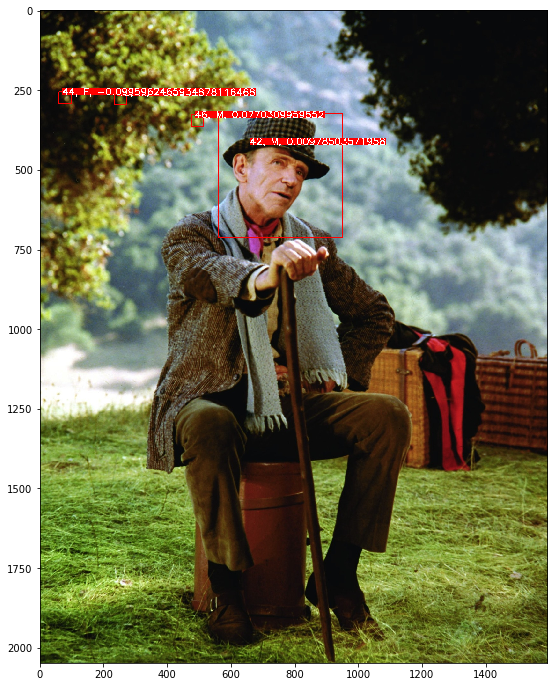

/home/saadi/Desktop/test_xml _write/images/4.jpg
('Image height is =', 1968)
('Image width is =', 1997)
('The output of dlib fed into cnn', rectangles[[(171, 1167) (216, 1212)], [(1841, 988) (1859, 1006)], [(407, 52) (425, 70)], [(993, 263) (1153, 423)]])
<class 'dlib.rectangles'>
<class 'dlib.rectangle'>
('Number of Faces detected', 4)
Detection [(171, 1167) (216, 1212)], score: 0.0898037944934, face_type:2
Detection [(1841, 988) (1859, 1006)], score: -0.0821014846662, face_type:2
Detection [(407, 52) (425, 70)], score: -0.147058948391, face_type:1
Detection [(993, 263) (1153, 423)], score: -0.149283231274, face_type:3
('the i is ', 0)
('the d is ', rectangle(171,1167,216,1212))
('the i is ', 1)
('the d is ', rectangle(1841,988,1859,1006))
('the i is ', 2)
('the d is ', rectangle(407,52,425,70))
('the i is ', 3)
('the d is ', rectangle(993,263,1153,423))


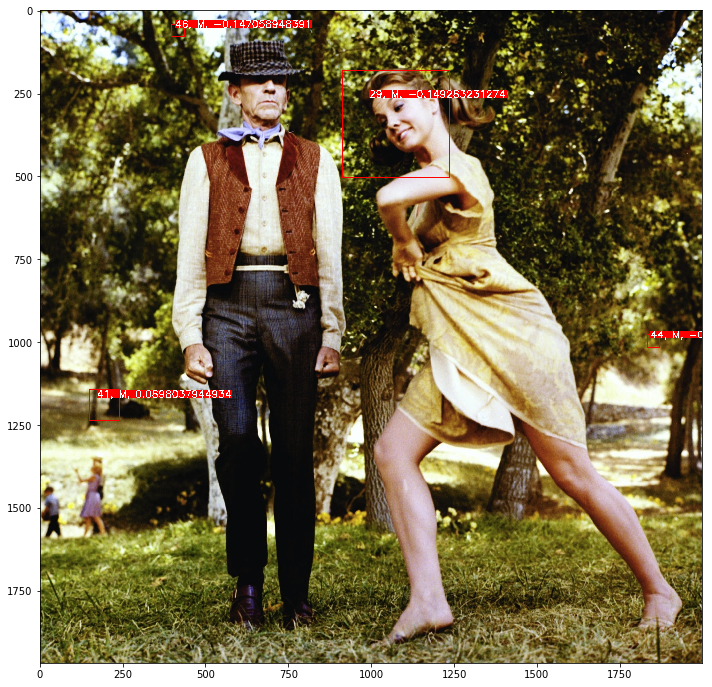

/home/saadi/Desktop/test_xml _write/images/5.jpg
('Image height is =', 1501)
('Image width is =', 1978)
('The output of dlib fed into cnn', rectangles[[(1174, 379) (1405, 610)]])
<class 'dlib.rectangles'>
<class 'dlib.rectangle'>
('Number of Faces detected', 1)
Detection [(1174, 379) (1405, 610)], score: -6.6026561695e-05, face_type:1
('the i is ', 0)
('the d is ', rectangle(1174,379,1405,610))


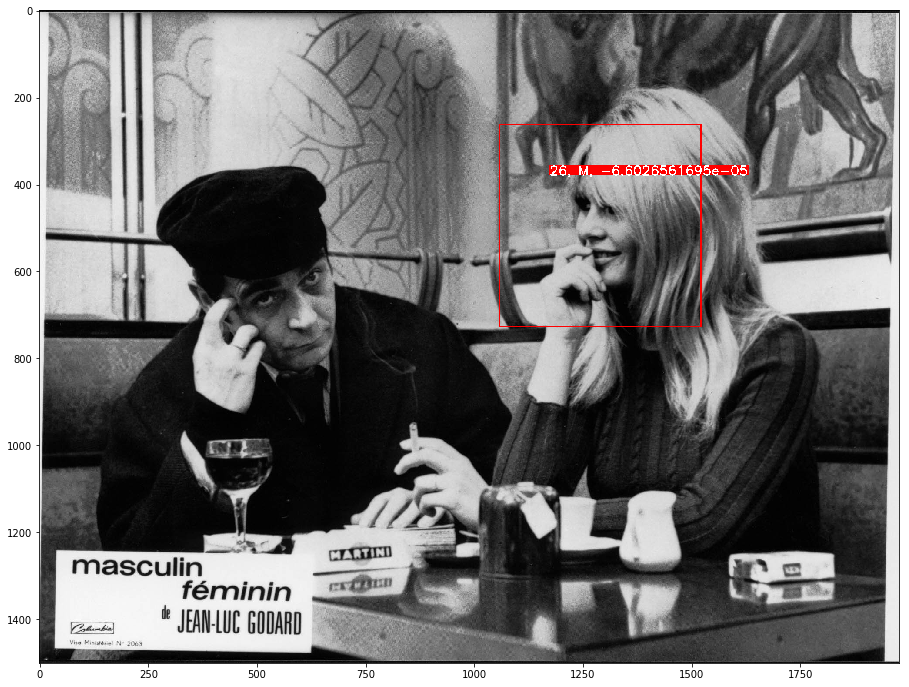

/home/saadi/Desktop/test_xml _write/images/6.jpg
('Image height is =', 4054)
('Image width is =', 2519)
('The output of dlib fed into cnn', rectangles[])
<class 'dlib.rectangles'>


IndexError: 

In [5]:
from PIL import Image
#import face_recognition
# list of image file names
v=0
for img in yield_images:
    print(img)
    img = cv2.imread(img)    # here goes the image file path
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(input_img)
    #plt.imshow(img)
    img_h, img_w, _ = np.shape(img)
    print('Image height is =',img_h)
    print('Image width is =',img_w)
    
    # for face detection dlib
    detector = dlib.get_frontal_face_detector()
    detected, scores, idx = detector.run(img, 2, -0.15)
    print('The output of dlib fed into cnn',detected)
    print(type(detected))
    print(type(detected[0])) #### i addeed this
    faces = np.empty((len(detected), img_size, img_size, 3))
    print('Number of Faces detected',len(detected))
    #print(faces)
    #print(type(faces))
    #Face detection Haar
    '''  
    face_cascade=cv2.CascadeClassifier('/home/saadi/opencv-Haar/data/haarcascades_cuda/haarcascade_frontalface_alt2.xml')
    faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    )
    print("Found {0} faces!".format(len(faces)))
    r=0
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        r=r+1
    #print('the number of faces are=',r)    
    plt.figure(figsize=(20,12))
    plt.imshow(img)
    plt.show() ## this is compulsary to show plot    

    '''
    
    
    if len(detected) > 0:
            for i, d in enumerate(detected):
                x1, y1, x2, y2, w, h = d.left(), d.top(), d.right() + 1, d.bottom() + 1, d.width(), d.height()
                xw1 = max(int(x1 - 0.5 * w), 0)
                yw1 = max(int(y1 - 0.5 * h), 0)
                xw2 = min(int(x2 + 0.5 * w), img_w - 1)
                yw2 = min(int(y2 + 0.5 * h), img_h - 1)
                #cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.rectangle(img, (xw1, yw1), (xw2, yw2), (255, 0, 0), 2)
                faces[i, :, :, :] = cv2.resize(img[yw1:yw2 + 0, xw1:xw2 + 0, :], (img_size, img_size))
                print("Detection {}, score: {}, face_type:{}".format(d, scores[i], idx[i]))
                                    

            # predict ages and genders of the detected faces
            results = model.predict(faces)
            predicted_genders = results[0]
            ages = np.arange(0, 101).reshape(101, 1)
            predicted_ages = results[1].dot(ages).flatten()
           # print('The age detected is'=)
            # draw results
            for i, d in enumerate(detected): # i is just a counter # class dlib.rectangles
                print('the i is ', i)
                print('the d is ', d)
                
                label = "{}, {}, {}".format(int(predicted_ages[i]),
                                        "F" if predicted_genders[i][0] > 0.56 else "M",scores[i])
                draw_label(img, (d.left(), d.top()), label)

    #cv2.imshow('result',img)
    plt.figure(figsize=(20,12))
    plt.imshow(img)
    plt.show() ## this is compulsary to show plot 
    #'''

In [ ]:
#testing coordinate locations.. used dlib general classifier 

import face_recognition
#img_h, img_w, _ = np.shape(img)

for img in yield_images:
    
    img= face_recognition.load_image_file(img)
    face_locations = face_recognition.face_locations(img)
    print("I found {} face(s) in this photograph.".format(len(face_locations)))
    
    
    for face_location in face_locations:
        top, right, bottom, left = face_location
        print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
       
        cv2.circle(img, (left,top-50), 5, 254, thickness=3, lineType=8, shift=0)
        cv2.circle(img, (left,bottom), 5, 253, thickness=3, lineType=8, shift=0)
        cv2.circle(img, (right,bottom), 5, 252, thickness=3, lineType=8, shift=0)
        cv2.circle(img, (right,top), 5, 251, thickness=3, lineType=8, shift=0)
        
        
    plt.figure(figsize=(20,12))
    plt.imshow(img)
    plt.show() ## this is compulsary to show plot    


In [ ]:
#testing xml format bbox
image='/home/saadi/Desktop/test_xml _write/images/1.jpg'
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


#the values from xml file go below
xmin=1140
ymin=1160
xmax=1461
ymax=1263

# below is 
left = xmin
top = ymax
bottom= ymin
right = xmax

cv2.circle(img, (left,top), 5, 0, thickness=3, lineType=8, shift=0)
cv2.circle(img, (left,bottom), 5, 75, thickness=3, lineType=8, shift=0)
cv2.circle(img, (right,bottom), 5, 150, thickness=3, lineType=8, shift=0)
cv2.circle(img, (right,top), 5, 200, thickness=3, lineType=8, shift=0)

#cv2.rectangle(img,(left,top),(right,bottom),(255,0,0),2)

cv2.rectangle(img,(xmin,ymax),(xmax,ymin),(255,0,0),2)

plt.figure(figsize=(20,12))
plt.imshow(img)
plt.show() ##




In [ ]:
import xml.etree.ElementTree as ET 
tree = ET.parse('/home/saadi/Desktop/test_xml _write/annotations/1.xml')  

#### Code below is for appending 
xmlRoot = tree.getroot()

y= 123
r = str(y)

## Face code


child1 = ET.Element("object")
c = ET.SubElement(child1, 'name')
c.text = "Face"

#age code
c = ET.SubElement(child1, 'Age')
c.text = "age number"

#gender code

c = ET.SubElement(child1, 'Gender')
c.text = "male/Female"

d = ET.SubElement(child1, 'bndbox')
e = ET.SubElement(d, 'xmin')
e.text = r
e = ET.SubElement(d, 'ymin')
e.text = "00"
e = ET.SubElement(d, 'xmax')
e.text = "00"
e = ET.SubElement(d, 'ymax')
e.text = "00"

xmlRoot.append(child1)
tree.write("/home/saadi/Desktop/test_xml _write/annotations/1.xml")

'''
## Age 
xmlRoot = tree.getroot()
child2 = ET.Element("object")
c = ET.SubElement(child2, 'name')
c.text = "Age"
f = ET.SubElement(child2, 'Age_estimated')
f.text="Age_number"
d = ET.SubElement(child2, 'bndbox')
e = ET.SubElement(d, 'xmin')
e.text = r
e = ET.SubElement(d, 'ymin')
e.text = "00"
e = ET.SubElement(d, 'xmax')
e.text = "00"
e = ET.SubElement(d, 'ymax')
e.text = "00"


# Gender
xmlRoot = tree.getroot()
child3 = ET.Element("object")
c = ET.SubElement(child3, 'name')
c.text = "Gender"
f = ET.SubElement(child3, 'Gender_Classified')
f.text="Male or Female"
d = ET.SubElement(child3, 'bndbox')
e = ET.SubElement(d, 'xmin')
e.text = r
e = ET.SubElement(d, 'ymin')
e.text = "00"
e = ET.SubElement(d, 'xmax')
e.text = "00"
e = ET.SubElement(d, 'ymax')
e.text = "00"

xmlRoot.append(child1)
xmlRoot.append(child2)
xmlRoot.append(child3)
tree.write("/home/saadi/Desktop/test_xml _write/annotations/1.xml")

#root = tree.getroot()
# all items data

#print(len(root[30])) 

#print('\nAll item data:')  
#print(len(root))

for elem in root:  # folder filename path
    print(elem.text)
    for subelem in elem:#
        print(subelem.text)
        for entery in subelem:
            print(entery.text)

tree.getroot()
root.tag, root.attrib

i=0
for child_of_root in root:
   print(child_of_root.tag, child_of_root.attrib, i)
   i=i+1
#root[20].tag, root[10].text   #writing root names and text if any

for elem in tree.iter():           #print all the tags in depth
   print(elem.tag, elem.attrib)

for elem in tree.iter(tag='xmin'):  #search for tag
    print(elem.tag, elem.attrib)
   
    
for elem in tree.iterfind('object/bndbox/xmin'):
    print(elem.tag, elem.attrib)
''' 
